In [96]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import program_functions as pf
from scipy import ndimage as nd
%matplotlib inline

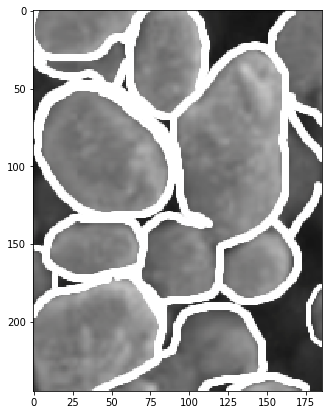

In [23]:
img = cv2.imread(r'particle_images\crop_label.png')
plt.figure(figsize=(7,7))
plt.imshow(img, cmap='gray')
plt.show()

In [25]:
#Blur the image a bit to remove some edge noise using 3x3 kernel
img_blur = cv2.medianBlur(img, 3)

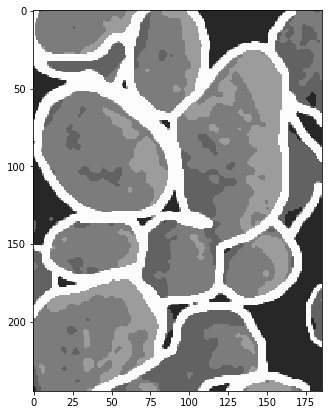

In [21]:
#Perform first K-Means Clustering to get 5 unique color pixel values
new_img = pf.k_cluster(img_blur, k=5, max_iter = 100,epsilon = 0.1)

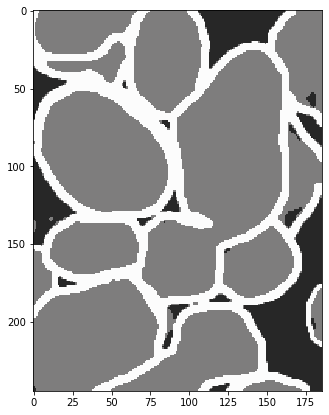

In [22]:
#Perform second K-Means Clustering to further narrow down to 3 unique color pixel values
new_img2 = pf.k_cluster(new_img, k=3, max_iter = 100,epsilon = 0.1)

In [27]:
# Since not all regions of the particle are perfectly colored in, we need to manually relabel those regions using Microsoft Windows Paint program.
# This means we have to save the image to our computer first
plt.imsave('particle_images\crop_5_3_cluster.png', new_img2)

In [28]:
# After relabeling, we can perform K-Means Cluster again to get 3 distinct color pixel values
# This step is necessary since any inaccuracies from pre-labeling will propagate into the machine learning model.
# The model is only as good as the training input images provided

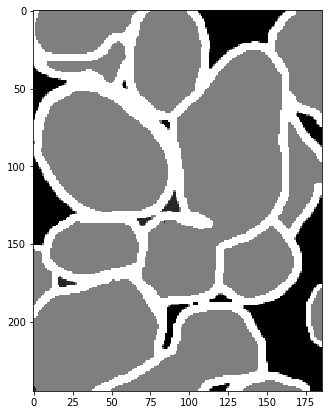

In [75]:
img = cv2.imread(r'particle_images\crop_relabel.png', 0)
plt.figure(figsize=(7,7))
plt.imshow(img, cmap='gray')
plt.show()

In [77]:
# Now the pre-labeled image is perfect with 3 distinct color pixel values shown below
# Pandas library has a function to count distinct values in a list
# This means the 2-D grayscale image needs to be reshaped into a 1-D array
img_reshape = img.reshape(-1)
pd.Series(img_reshape).value_counts()

127    30226
255     9750
0       4993
125      320
39       145
252      134
126        2
dtype: int64

In [79]:
# The 3 main distinct color pixel values should be 127, 255, 0... the rest are noise that was added from the manual paint program
# They can be set equal to those 3 pixel values

img_reshape[img_reshape == 125] = 127
img_reshape[img_reshape == 39] = 0
img_reshape[img_reshape == 126] = 127
img_reshape[img_reshape == 252] = 255

In [82]:
#Now the image has only 3 distinct color pixels to use as class labels for machine learning
pd.Series(img_reshape).value_counts()

127    30548
255     9884
0       5138
dtype: int64

In [84]:
# Best practice to save this image for future use. So we must convert the 1-D array back into a 2-D array image
img = img_reshape.reshape(img.shape)
plt.imsave('crop_final.png', img, cmap='gray')